In [66]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../data-scientist-job-market-in-the-us/"))
import pandas_profiling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
base_data_df = pd.read_csv('alldata.csv')
import missingno as msno

['fulltimeLA.csv', 'fulltimeCHI.csv', 'fulltimeNY.csv', 'fulltimeBO.csv', 'fulltimeAT.csv', 'fulltimeMA.csv', 'fulltimeMV.csv', 'alldata.csv', 'data_science_market.ipynb', 'fulltimeSU.csv', 'fulltimeSF.csv', 'fulltimeSEA.csv', 'fulltimeSD.csv', 'fulltimeRM.csv', 'fulltimeDC.csv', 'ds.ipynb', '.ipynb_checkpoints', 'fulltimeAL.csv', 'fulltimeBOS.csv']


In [11]:
df.describe(include='all')

,position,company,description,reviews,location
count,6953,6953,6953,5326.000000,6953
unique,5242,2213,6708,NaN,382
top,Data Scientist,Amazon.com,Note: By applying to this position your applic...,NaN,"Seattle, WA"
freq,351,358,9,NaN,563
mean,NaN,NaN,NaN,3179.089185,NaN
std,NaN,NaN,NaN,8448.515056,NaN
min,NaN,NaN,NaN,2.000000,NaN
25%,NaN,NaN,NaN,27.000000,NaN
50%,NaN,NaN,NaN,230.000000,NaN
75%,NaN,NaN,NaN,1578.000000,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
reviews        5326 non-null float64
location       6953 non-null object
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


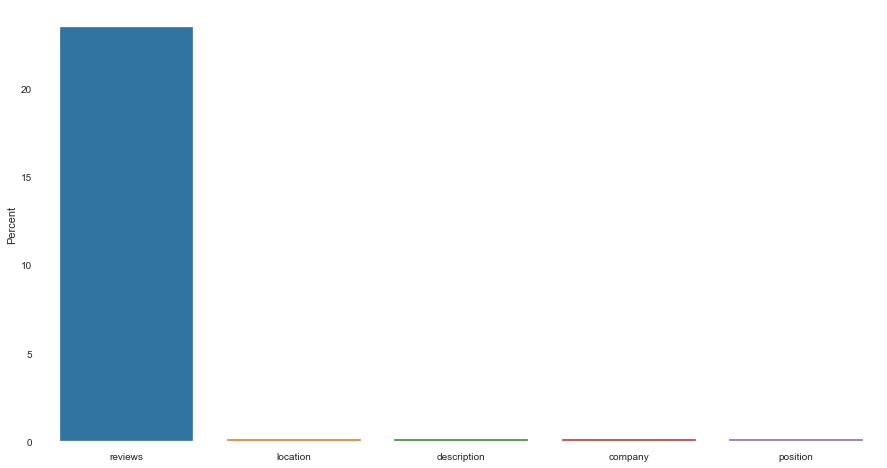

In [64]:
count_null = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
filtered_data = pd.concat([count_null, percent], axis=1, keys=['Num of missing values', 'Percent'])
fix, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=filtered_data.index, y=filtered_data.Percent)

plt.show()

In [59]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [63]:
pandas_profiling.ProfileReport(base_data_df)

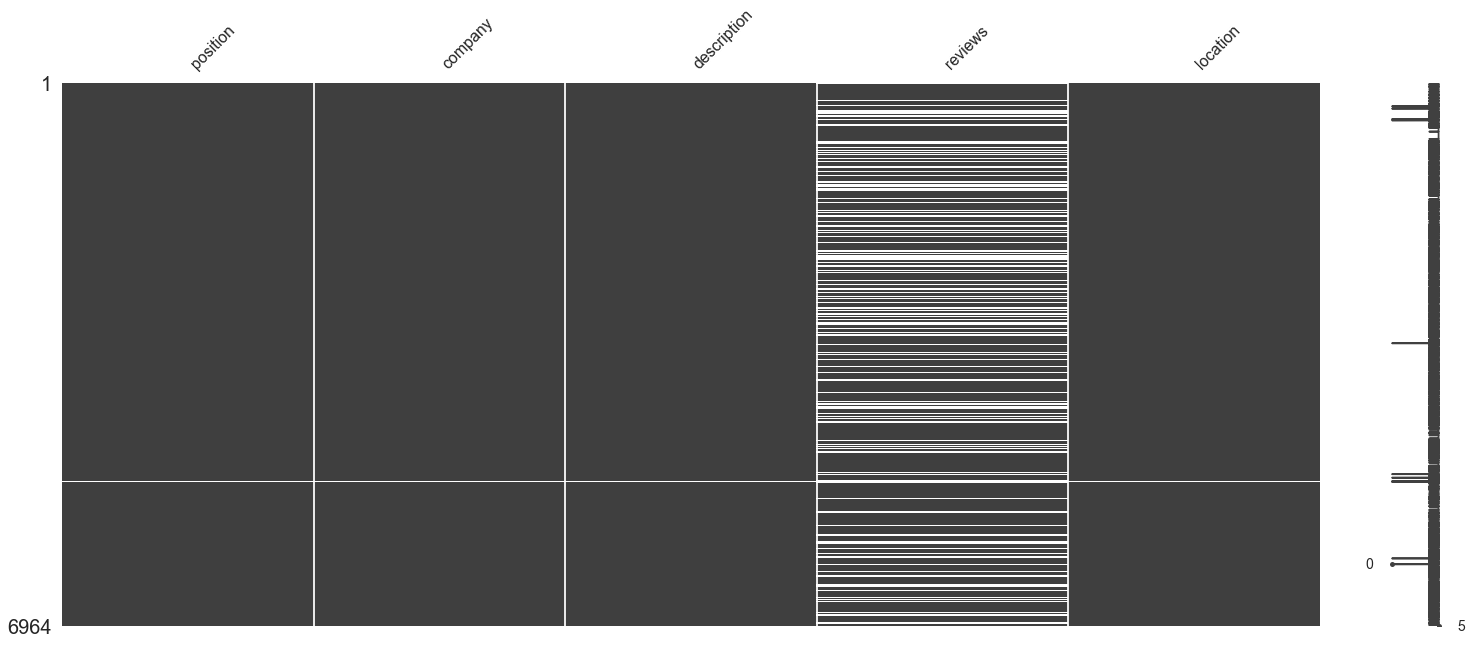

In [68]:
filtered_matrix = msno.nullity_filter(base_data_df, n=15, filter='Bottom', p=0.2)
msno.matrix(filtered_matrix)

### Looking for duplicates

In [65]:
base_data_df[base_data_df.duplicated()]

,position,company,description,reviews,location
331,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN
3337,NaN,NaN,NaN,NaN,NaN
5014,NaN,NaN,NaN,NaN,NaN
5059,NaN,NaN,NaN,NaN,NaN
5103,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN
6093,NaN,NaN,NaN,NaN,NaN
6168,NaN,NaN,NaN,NaN,NaN


In [69]:
ds_df = base_data_df.copy()

In [73]:
ds_df.dropna(inplace=True)
ds_df['reviews'].fillna(0, inplace=True)

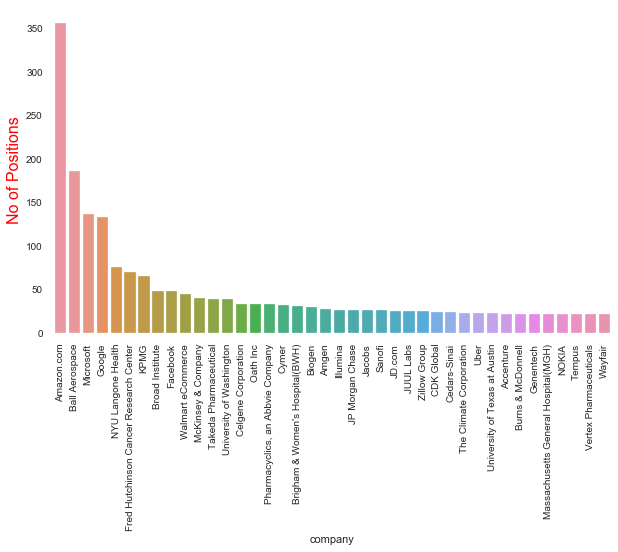

In [88]:
# finding the top 40 companies which has open positions

from matplotlib.pyplot import figure, show
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=ds_df.groupby('company').count().nlargest(40, 'position').reset_index(), x = 'company', y='position')
ax.set_xticklabels(ds_df.groupby('company').count().nlargest(40, 'position').reset_index()['company'],rotation=90) 
ax.set_ylabel('No of Positions', fontsize=16, color='red')
plt.show()


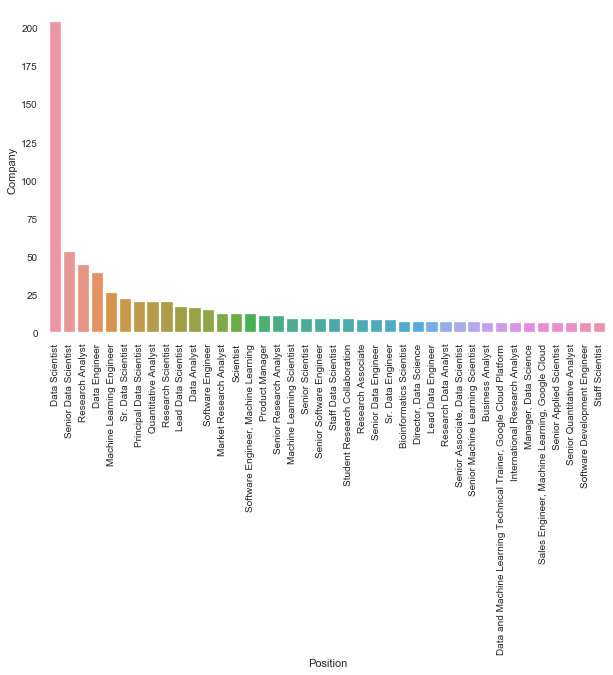

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=ds_df.groupby('position').count().nlargest(40, 'company').reset_index(), x='position', y='company')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Position')
ax.set_ylabel('Company')
plt.show()

In [108]:
ds_df.loc[ds_df['position'].str.contains('Director', case=False) & ds_df['position'].str.contains('data', case=False), 'designation'] = 'Director'

In [116]:
ds_df.loc[ds_df['position'] == 'Data Science Manager', 'designation']

1506    NaN
1749    NaN
3694    NaN
6185    NaN
6487    NaN
Name: designation, dtype: object

position                                            Data Analyst
company                                           Operation HOPE
description    DEPARTMENT: Program OperationsPOSITION LOCATIO...
reviews                                                       44
location                                      Atlanta, GA 30303 
designation                                                  NaN
Name: 3, dtype: object